/var/folders/7b/2v0xwt5x3hl7rzn5ys320f6c0000gn/T/ipykernel_70875/2926712116.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv("./data/Portfolios_Formed_on_ME_monthly_EW.csv",


<Axes: >

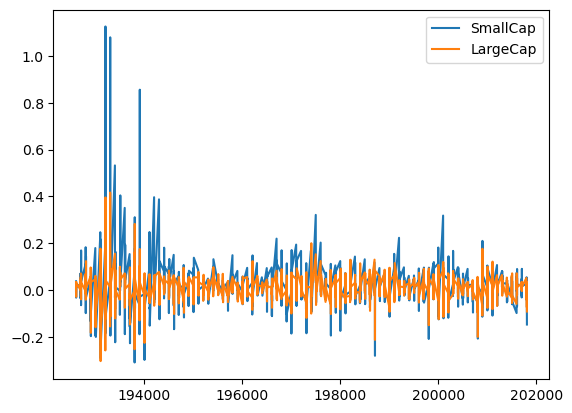

In [ ]:
# Read in data 
import pandas as pd 
import matplotlib.pyplot as plt


me_m = pd.read_csv("./data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 20', 'Hi 20']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()







In [22]:
# timeseries- forcing the index to be a datetime

rets.index= pd.to_datetime(rets.index, format="%Y%m")
rets.index

# Convert index to montly 
rets.index = rets.index.to_period('M')
rets.head()
rets.info()
rets.describe()


<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


,SmallCap,LargeCap
count,1110.000000,1110.000000
mean,0.015904,0.009434
std,0.097197,0.056325
min,-0.309900,-0.304000
25%,-0.026950,-0.019175
50%,0.011900,0.012300
75%,0.048300,0.038375
max,1.126000,0.416300


In [ ]:
# Annualized return 
n_months = rets.shape[0]
annualized_return = (rets+1).prod()**(12/n_months) - 1
annualized_return


SmallCap    0.151977
LargeCap    0.098490
dtype: float64

In [26]:
# Annualized volatility 
annualized_vol = rets.std() * np.sqrt(12)
annualized_vol



SmallCap    0.336701
LargeCap    0.195116
dtype: float64

In [27]:
# Annualized volatility of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive) 
rets_1999_2015 = rets['1999-01':'2015-12']
rets_1999_2015.head()
rets_1999_2015.info()
rets_1999_2015.describe()




<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 204 entries, 1999-01 to 2015-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  204 non-null    float64
 1   LargeCap  204 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


,SmallCap,LargeCap
count,204.000000,204.000000
mean,0.011204,0.006347
std,0.066076,0.049858
min,-0.208000,-0.200600
25%,-0.027975,-0.021550
50%,0.010450,0.009750
75%,0.047250,0.035100
max,0.317900,0.176200


In [32]:
n_months = rets_1999_2015.shape[0]
annualized_return = (rets_1999_2015+1).prod()**(12/n_months) - 1
annualized_return




SmallCap    0.114426
LargeCap    0.062865
dtype: float64

In [31]:
annualized_vol = rets_1999_2015.std() * np.sqrt(12)
annualized_vol


SmallCap    0.228894
LargeCap    0.172713
dtype: float64

In [ ]:
# A Different method:
 
# What was the Annualized Volatility of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)? 
import numpy as np

# Slice the time window and select Lo 20 (renamed to SmallCap)
lo20_1999_2015 = rets.loc['1999-01':'2015-12', 'SmallCap'].dropna()

# Annualized volatility: monthly std * sqrt(12)
annualized_vol_lo20 = lo20_1999_2015.std() * np.sqrt(12)
print(f"Annualized volatility (Lo 20, 1999-2015): {annualized_vol_lo20:.2%}")


Annualized volatility (Lo 20, 1999-2015): 22.89%


In [41]:

def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

drawdown(rets["LargeCap"])


# Passing through function and identify max drawdown and period

drawdown(rets["SmallCap"]["1999":"2015"])["Drawdown"]



1999-01    0.000000
1999-02   -0.039900
1999-03   -0.069471
1999-04    0.000000
1999-05    0.000000
             ...   
2015-08   -0.113764
2015-09   -0.167825
2015-10   -0.135786
2015-11   -0.121526
2015-12   -0.165450
Freq: M, Name: Drawdown, Length: 204, dtype: float64

In [42]:
print(drawdown(rets["SmallCap"]["1999":"2015"])["Drawdown"].idxmin())
print(drawdown(rets["SmallCap"]["1999":"2015"])["Drawdown"].min())


2009-02
-0.6248092431236988


In [43]:
print(drawdown(rets["LargeCap"]["1999":"2015"])["Drawdown"].idxmin())
print(drawdown(rets["LargeCap"]["1999":"2015"])["Drawdown"].min())


2009-02
-0.5527349978713653


In [45]:
# NEW DATASET and testing Semi-deviation 
import pandas as pd
import numpy as np

def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})


def get_ffme_returns():
    """
    Load the Fama-French Dataset for the returns of the Top and Bottom Deciles by MarketCap
    """
    me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                       header=0, index_col=0, na_values=-99.99)
    rets = me_m[['Lo 10', 'Hi 10']]
    rets.columns = ['SmallCap', 'LargeCap']
    rets = rets/100
    rets.index = pd.to_datetime(rets.index, format="%Y%m").to_period('M')
    return rets


def get_hfi_returns():
    """
    Load and format the EDHEC Hedge Fund Index Returns
    """
    hfi = pd.read_csv("./data/edhec-hedgefundindices.csv",
                      header=0, index_col=0, parse_dates=True)
    hfi = hfi/100
    hfi.index = hfi.index.to_period('M')
    return hfi


def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3


def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4


import scipy.stats
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(is_normal)
    else:
        statistic, p_value = scipy.stats.jarque_bera(r)
        return p_value > level

    
def semideviation(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)


def var_historic(r, level=5):
    """
    Returns the historic Value at Risk at a specified level
    i.e. returns the number such that "level" percent of the returns
    fall below that number, and the (100-level) percent are above
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")


def cvar_historic(r, level=5):
    """
    Computes the Conditional VaR of Series or DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level)
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")


from scipy.stats import norm
def var_gaussian(r, level=5, modified=False):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    If "modified" is True, then the modified VaR is returned,
    using the Cornish-Fisher modification
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
    return -(r.mean() + z*r.std(ddof=0))


In [47]:
# Load Hfi dataset 

hfi = get_hfi_returns()
hfi.head()
hfi.info()
hfi.describe()





<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 263 entries, 1997-01 to 2018-11
Freq: M
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Convertible Arbitrage   263 non-null    float64
 1   CTA Global              263 non-null    float64
 2   Distressed Securities   263 non-null    float64
 3   Emerging Markets        263 non-null    float64
 4   Equity Market Neutral   263 non-null    float64
 5   Event Driven            263 non-null    float64
 6   Fixed Income Arbitrage  263 non-null    float64
 7   Global Macro            263 non-null    float64
 8   Long/Short Equity       263 non-null    float64
 9   Merger Arbitrage        263 non-null    float64
 10  Relative Value          263 non-null    float64
 11  Short Selling           263 non-null    float64
 12  Funds Of Funds          263 non-null    float64
dtypes: float64(13)
memory usage: 28.8 KB


/var/folders/7b/2v0xwt5x3hl7rzn5ys320f6c0000gn/T/ipykernel_70875/1783633495.py:37: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv("./data/edhec-hedgefundindices.csv",


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,0.005508,0.004074,0.006946,0.006253,0.004498,0.006344,0.004365,0.005403,0.006331,0.005356,0.005792,-0.001701,0.004262
std,0.016567,0.023335,0.017042,0.032538,0.008130,0.016744,0.011539,0.014722,0.019935,0.009619,0.011484,0.047746,0.015566
min,-0.123700,-0.056800,-0.083600,-0.192200,-0.058700,-0.088600,-0.086700,-0.031300,-0.067500,-0.054400,-0.069200,-0.134000,-0.061800
25%,-0.000150,-0.012050,-0.001450,-0.009750,0.001500,-0.001450,0.001650,-0.004050,-0.004750,0.000600,0.001000,-0.027100,-0.003500
50%,0.006500,0.001400,0.008900,0.009600,0.005100,0.008400,0.005500,0.003800,0.007900,0.006000,0.006700,-0.005300,0.005200
75%,0.013600,0.019850,0.017750,0.025700,0.008300,0.016200,0.009550,0.012400,0.019150,0.011100,0.012950,0.019850,0.012100
max,0.061100,0.069100,0.050400,0.123000,0.025300,0.044200,0.036500,0.073800,0.074500,0.027200,0.039200,0.246300,0.066600


In [48]:
# Filter data set from 2009 onwards 
hfi_2009 = hfi["2009":]
hfi_2009.head()
hfi_2009.info()
hfi_2009.describe()



<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 119 entries, 2009-01 to 2018-11
Freq: M
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Convertible Arbitrage   119 non-null    float64
 1   CTA Global              119 non-null    float64
 2   Distressed Securities   119 non-null    float64
 3   Emerging Markets        119 non-null    float64
 4   Equity Market Neutral   119 non-null    float64
 5   Event Driven            119 non-null    float64
 6   Fixed Income Arbitrage  119 non-null    float64
 7   Global Macro            119 non-null    float64
 8   Long/Short Equity       119 non-null    float64
 9   Merger Arbitrage        119 non-null    float64
 10  Relative Value          119 non-null    float64
 11  Short Selling           119 non-null    float64
 12  Funds Of Funds          119 non-null    float64
dtypes: float64(13)
memory usage: 13.0 KB


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,0.006623,0.000497,0.006559,0.005205,0.002556,0.005595,0.005478,0.002676,0.005209,0.003716,0.005452,-0.010350,0.002470
std,0.013693,0.019843,0.015791,0.023560,0.006190,0.014713,0.007649,0.010381,0.016908,0.006468,0.009510,0.034306,0.010736
min,-0.024400,-0.056800,-0.040200,-0.069500,-0.021100,-0.040100,-0.012200,-0.023100,-0.046100,-0.013600,-0.020000,-0.099000,-0.027200
25%,-0.000200,-0.014350,-0.003400,-0.007350,-0.000150,-0.002550,0.001550,-0.004950,-0.004850,-0.000250,0.000250,-0.030150,-0.003450
50%,0.004500,-0.000300,0.008200,0.006100,0.003200,0.007000,0.005000,0.002000,0.006400,0.004700,0.005500,-0.014400,0.003900
75%,0.012200,0.014750,0.017600,0.016750,0.005900,0.014900,0.008700,0.009200,0.014400,0.008300,0.010750,0.008600,0.009150
max,0.061100,0.043600,0.050400,0.088400,0.016100,0.044200,0.036500,0.034800,0.051600,0.017200,0.039200,0.112200,0.031200


In [50]:
# Figure out which hedge fund has the highest semi-deviation 
semideviation(hfi_2009).sort_values()

Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64

In [52]:
# Figure out skewness 
skewness(hfi_2009).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

In [54]:
# Figure out kurtosis for data since 2000 
hfi_2000 = hfi["2000":]
kurtosis(hfi_2000).sort_values()




CTA Global                 2.845022
Global Macro               3.653278
Short Selling              4.352758
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Event Driven               5.543444
Emerging Markets           5.941289
Distressed Securities      6.231720
Funds Of Funds             7.584725
Relative Value            12.731096
Equity Market Neutral     20.329621
Convertible Arbitrage     23.001449
Fixed Income Arbitrage    33.378729
dtype: float64